## Lesson-02

### From simple linear Regression to complicated neural networks

### From manul coding gradients to auto-gradients 

### Previus: Let the computer fit functions

??? 我们只能让计算机拟合简单的线性函数

### 1.除了线性函数关系（kx + b）还有一种常见的函数关系是 "s"型的一种函数

$$ sigmoid(x) = \sigma(x) = \frac{1}{1 + e^(-x)}$$

In [1]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [9]:
import random

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [57]:
def random_linear(x):
    k, b = random.normalvariate(0, 1), random.normalvariate(0, 1)
    
    return k *  x + b

In [58]:
sub_x = np.linspace(-10, 10)

In [59]:
from matplotlib.animation import FuncAnimation

In [60]:
%matplotlib notebook

<IPython.core.display.Javascript object>


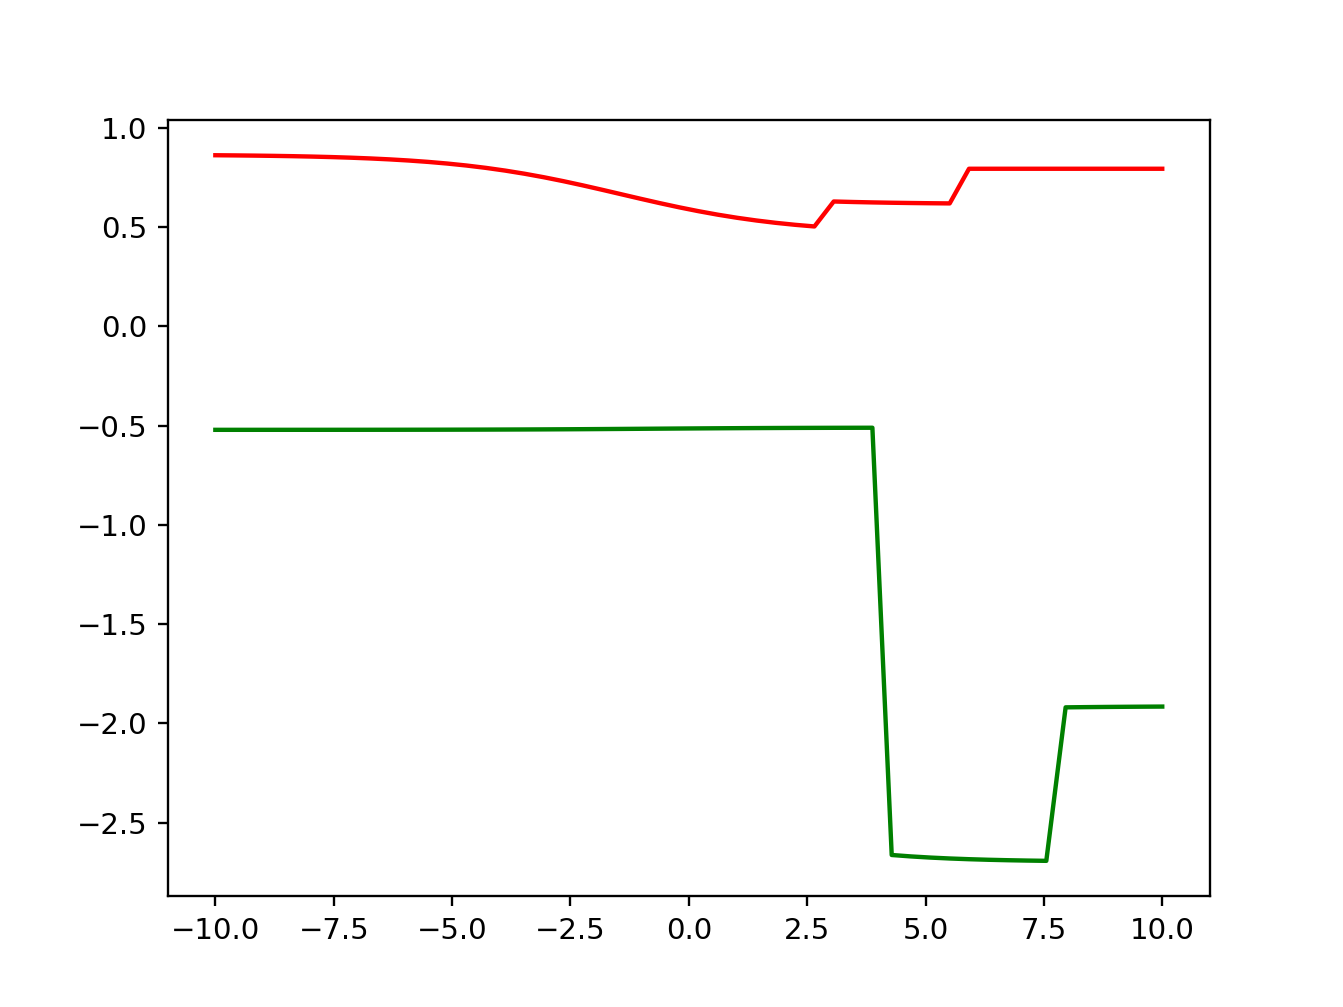

In [65]:
def draw_a_random_curve():
    i = random.choice(range(len(sub_x)))
    linear_output = np.concatenate((random_linear(sub_x[:i]), random_linear(sub_x[i:])))
    i2 = random.choice(range(len(linear_output)))
    output = np.concatenate((random_linear(sigmoid(linear_output[:i2])), random_linear(sigmoid(linear_output[i2:]))))
    
    return output

def draw(index):
    fig.clear()
    plt.plot(sub_x, draw_a_random_curve(), color='green')
    plt.plot(sub_x, draw_a_random_curve(), color='red')

fig = plt.gcf()
FuncAnimation(fig, draw, interval=500)

## 如果，我们把我们的房价的函数关系也写成类似的，linear和sigmoid之间的关系，会怎么样呢？

In [66]:
def model(x, k1, b1, k2, b2):
    linear1_output = k1 * x + b1
    sigmoid_output = sigmoid(linear1_output)
    linear2_output = k2 * sigmoid_output + b2
    
    return linear2_output

In [ ]:
k, b = random.random(), random.random()

min_loss = float('inf')
best_k, best_b = None, None

k_b_history = []

total_times = 5000
alpha = 1e-2

for t in range(total_times):
    k1 = k1 + (-1) * loss对k1的偏导
    b1 = b1 + (-1) * loss对b1的偏导
    k2 = k2 + (-1) * loss对k1的偏导
    b2 = b2 + (-1) * loss对b1的偏导
    
    loss_ = loss(Y, model(X_rm, k1, b1, k2, b2))
    if loss_ < min_loss: 
        min_loss = loss_
        best_k, best_b = k, b
        k_b_history.append((best_k, best_b))
        #print('在 {} 时刻我找到了更好的k：{}和b：{}， 这个时候的loss是：{}'.format(t, k, b, loss_))

## Define Problem: Given Model Definition, including the parameters: {k1, k2, b1, b2}，构建一个程序，让它能够求解出来k1, k2, b1, b2的偏导是多少

In [122]:
computing_graph = {
    'k1': ['L1'],
    'b1': ['L1'],
    'x': ['L1'],
    'L1': ['sigmoid'],
    'k2': ['L2'],
    'b2': ['L2'],
    'sigmoid': ['L2'],
    'L2': ['Loss'],
    'y': ['Loss']
}

In [73]:
import networkx as nx

## Based on the graph representation

## 如何求出来Loss对K1的偏导呢？

<IPython.core.display.Javascript object>


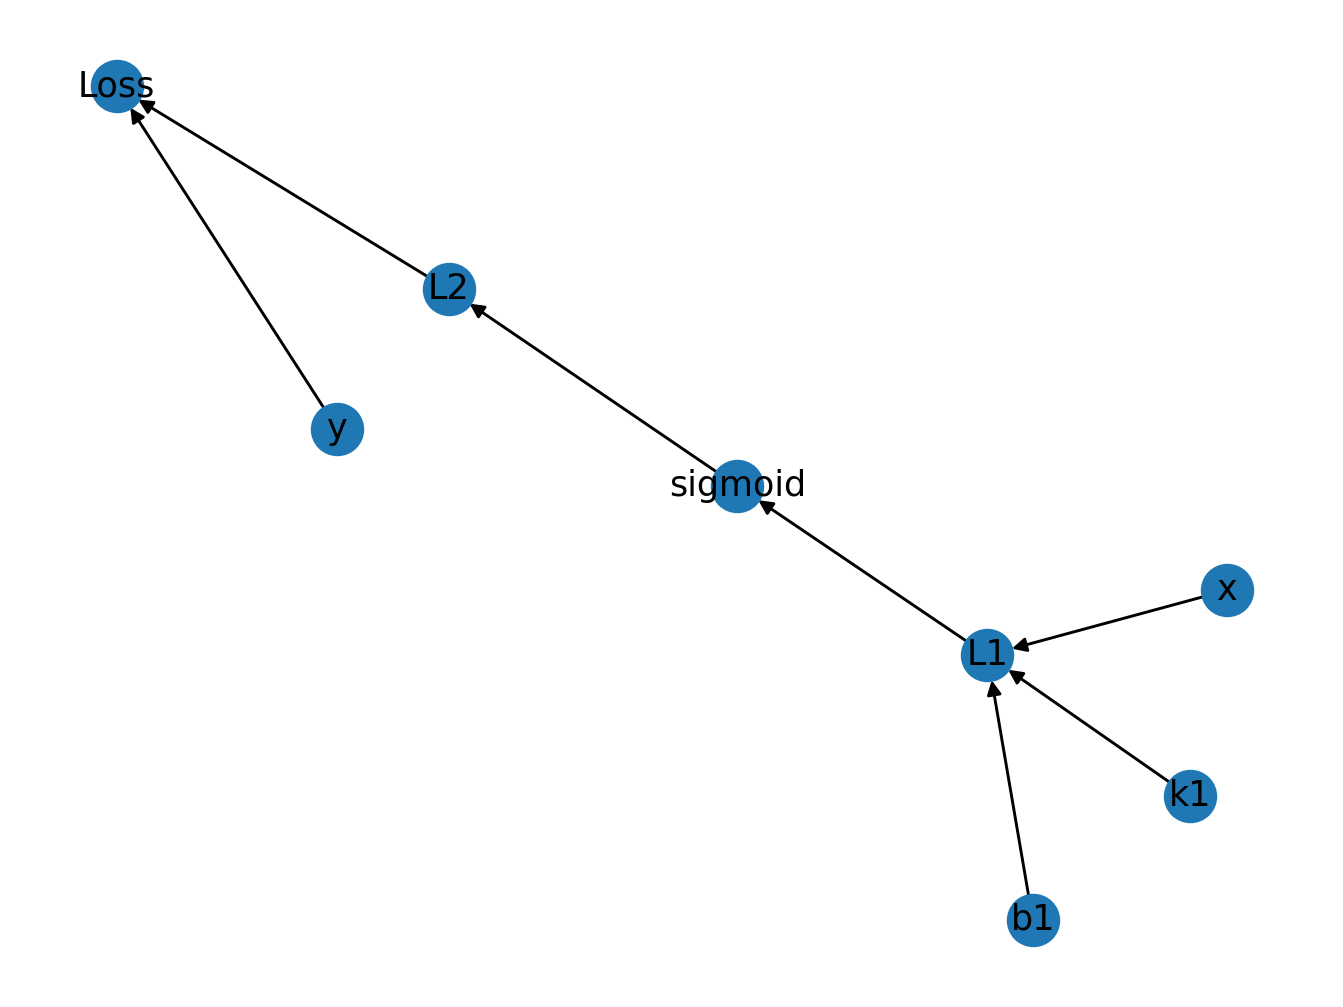

In [74]:
nx.draw(nx.DiGraph(computing_graph), with_labels=True)

In [79]:
def get_output(graph, node):
    outputs = []
    for n, links in graph.items():
        if node == n: outputs += links
    return outputs

In [80]:
get_output(computing_graph, 'k1')

['L1']

### 问，如何获得k1的偏导

+ 获得k1的输出节点
+ 获得k1输出节点的输出节点
+ .. 直到我们找到了最后的一个节点

In [128]:
def get_paramter_partial_order(p):

    computing_order = []

    target = p
    out = get_output(computing_graph, target)[0]
    computing_order.append(target)

    while out:
        computing_order.append(out)
        out = get_output(computing_graph, out)
        if out: out = out[0]

    order = []

    for index, n in enumerate(computing_order[:-1]):
        order.append((computing_order[index+1], n))

    return ' * '.join(['∂{}/∂{}'.format(a, b) for a, b in order[::-1]])

In [129]:
for p in ['b1', 'k1', 'b2', 'k2']:
    print(get_paramter_partial_order(p))

∂Loss/∂L2 * ∂L2/∂sigmoid * ∂sigmoid/∂L1 * ∂L1/∂b1
∂Loss/∂L2 * ∂L2/∂sigmoid * ∂sigmoid/∂L1 * ∂L1/∂k1
∂Loss/∂L2 * ∂L2/∂b2
∂Loss/∂L2 * ∂L2/∂k2


## 到这来，我们能够自动的求解各个参数的倒数了~

### Review 

1. 通过基本的函数我们可以拟合非常复杂的函数
2. 什么是激活函数，激活函数的意义和作用是什么
3. 什么是神经网络以及它的历史
4. 人工智能、神经网络、机器学习、深度学习之间有什么关系
5. 链式求导，以及为什么要有链式求导
6. 如何让计算机自动求出来求导的顺序，依据我们的模型定义（back propogation）
7. 反向传播的意义和作用？
8. 为了能够快速求解每个参数的导数不是需要构建一个图
9. 图的拓扑排序的作用
10. 图的拓扑排序的实现原理

## Next

1. 实现拓扑排序
2. 把输入、输出、计算、求导等每个节点都是用到的功能封装成一个类
3. 把这些类进行分装，能够自动实现求导，自动实现参数权重的更新（1， 2， 3）就是一个神经网络框架的核心
4. CNN，图像处理，文字处理等和我们的模型是什么关系
5. 我们把所学到的东西进行打包，进行通用化，发布到互联网，变成一个通用的人工智能框架